# A neural network for a classification with multiple labels

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
import os
from tqdm import tqdm

## load data

In [2]:
directory_data  = './'
filename_data   = 'assignment_05_data.npz'
path_data       = os.path.join(directory_data, filename_data) 
data            = np.load(path_data)

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)

vec_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vec_x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [3]:
print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('size of vector_x_train :', vec_x_train.shape)
print('size of vector_x_test :', vec_x_test.shape)
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
size of vector_x_train : (20000, 784)
size of vector_x_test : (8000, 784)
*************************************************


## index for each class

In [4]:
number_class        = y_train.shape[1]
length_data         = vec_x_train.shape[1]
number_data_train   = vec_x_train.shape[0]
number_data_test    = vec_x_test.shape[0]

index_train = {}
index_test  = {}

number_index_train  = np.zeros(number_class)
number_index_test   = np.zeros(number_class)

for i in range(number_class):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

In [5]:
print('*************************************************')
print('number of training data :', number_data_train)
print('length of testing data :', number_data_test)
print('*************************************************')
print('number of classes :', number_class)
print('length of data :', length_data)
print('*************************************************')
print('number of training images for each class :', number_index_train)
print('number of testing images for each class :', number_index_test)
print('*************************************************')

*************************************************
number of training data : 20000
length of testing data : 8000
*************************************************
number of classes : 10
length of data : 784
*************************************************
number of training images for each class : [2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.]
number of testing images for each class : [800. 800. 800. 800. 800. 800. 800. 800. 800. 800.]
*************************************************


## plot grey image

In [6]:
def plot_image(title, data):

    nRow = 2
    nCol = 5
    size = 2 
    
    fig, axes = plt.subplots(nRow, nCol, figsize=(size * nCol, size * nRow))
    fig.suptitle(title, fontsize=16)
    
    for i in range(nRow):
        for j in range(nCol):

            k = i * nCol + j
            axes[i, j].imshow(data[k], cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

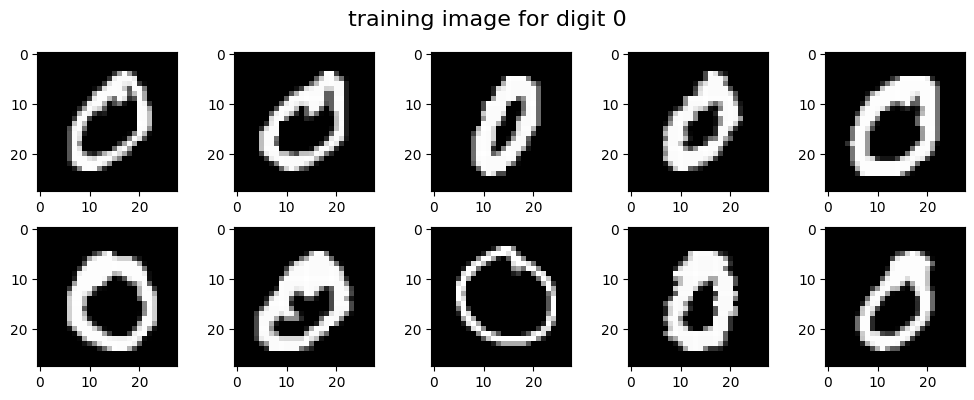

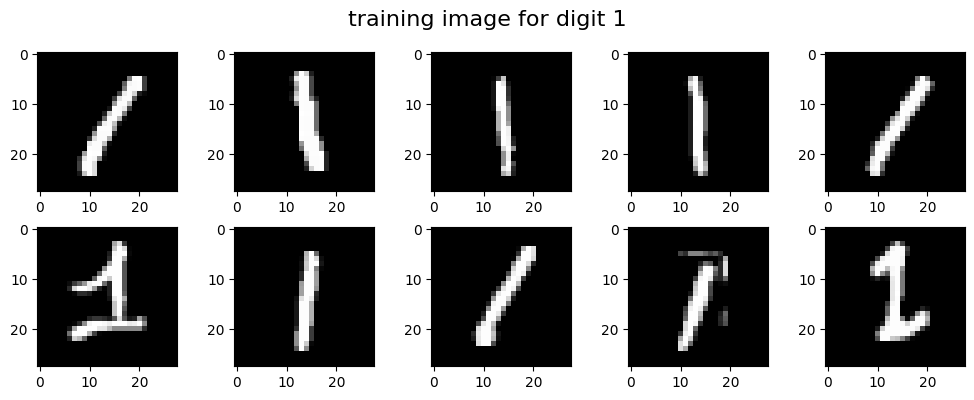

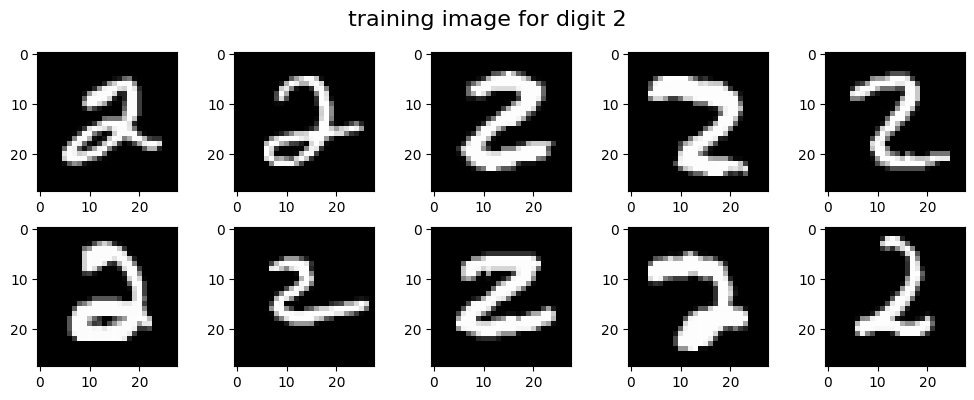

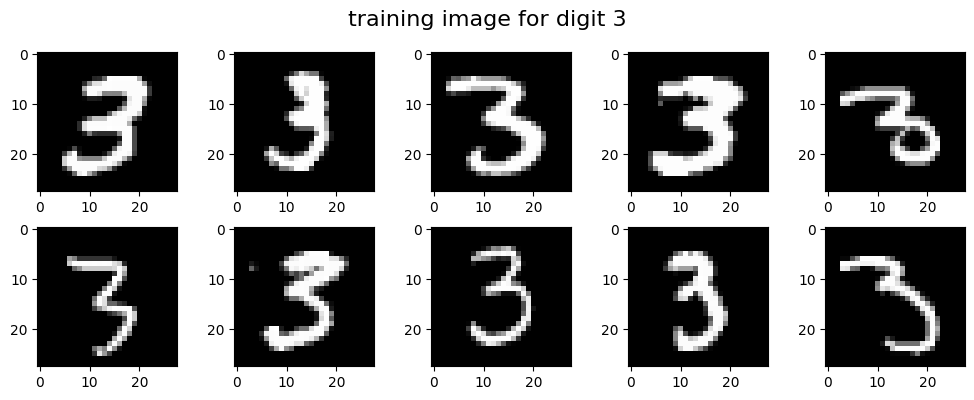

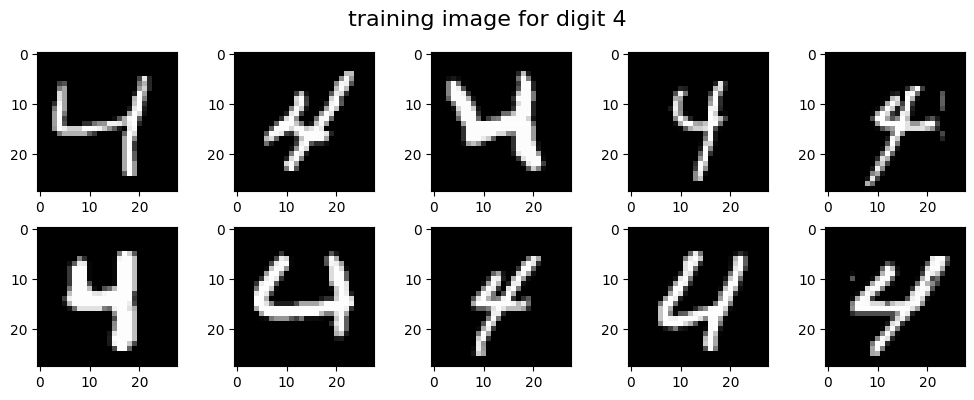

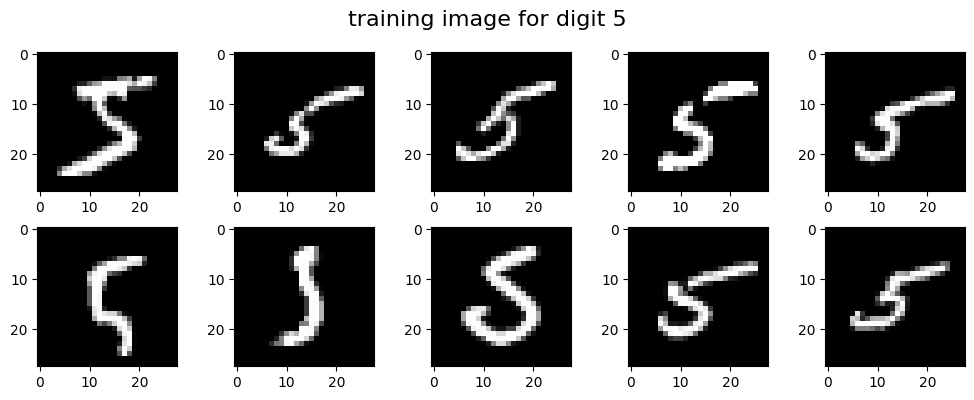

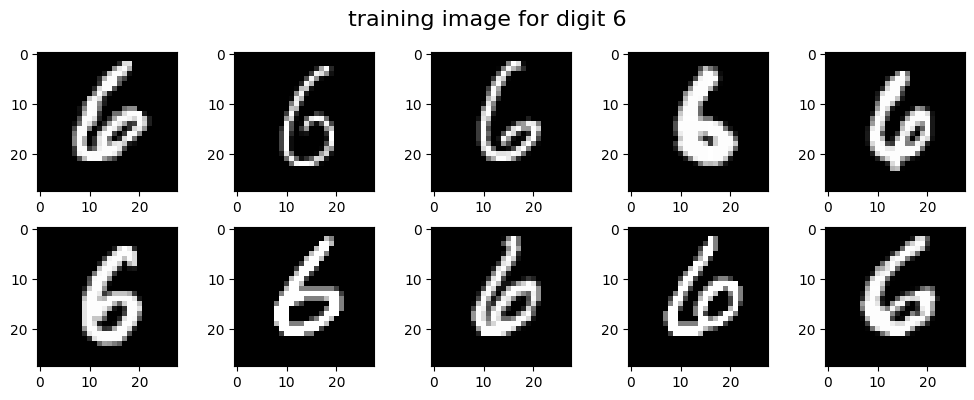

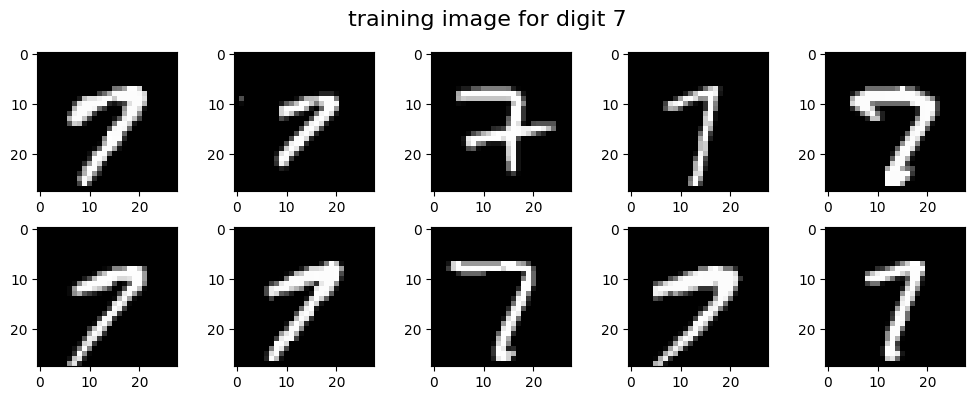

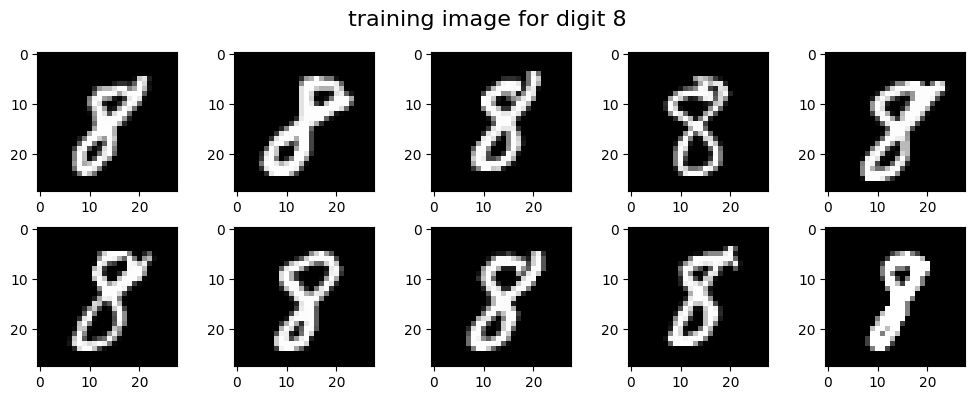

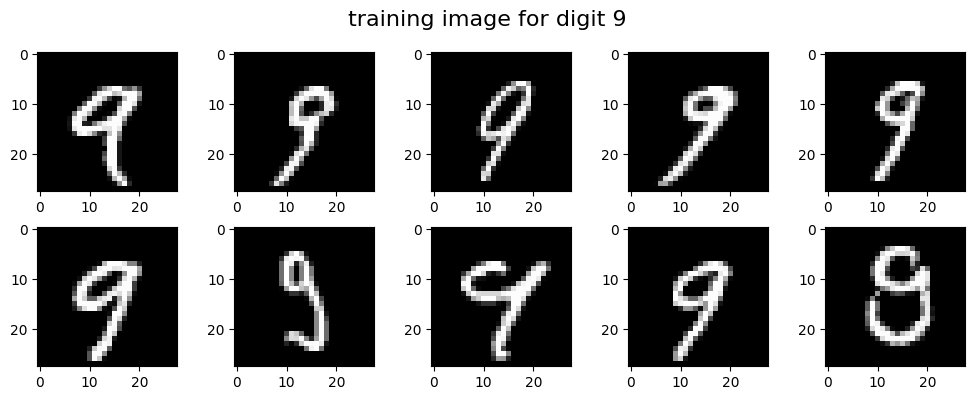

In [7]:
for c in range(number_class):

    index_class = c
    title       = 'training image for digit ' + str(index_class)
    plot_image(title, x_train[index_train[index_class][0]])

## initialize the neural network

- neural network consists of fullly connected linear layer followed by softmax activation function
- the size of the fully connected layer is input (length of data) and output (number of classes)

## initialize the weights for the fully connected layer

- create one matrix for the weights
- consider a bias in the construction of weights

In [8]:
# ================================================== 
# fill up the blank
#
size_input  = length_data + 1
size_output = number_class
#
# ================================================== 

weight = np.ones((size_input, size_output))

In [9]:
print('size of the weight :', weight.shape)

size of the weight : (785, 10)


## initialize the data for considering a bias

- add 1 at the end of each vectorized data

In [10]:
# ================================================== 
# fill up the blank
#
ones_train  = np.ones((vec_x_train.shape[0], 1))
ones_test   = np.ones((vec_x_test.shape[0], 1))

vec_x_train = np.concatenate((vec_x_train, ones_train), axis=1)
vec_x_test  = np.concatenate((vec_x_test, ones_test), axis=1)
#
# ================================================== 

In [11]:
print('size of training data :', vec_x_train.shape)
print('size of testing data :', vec_x_test.shape)

size of training data : (20000, 785)
size of testing data : (8000, 785)


## define neural network 

### define softmax function 

- input : number of data $\times$ number of classes
- output : number of data $\times$ number of classes

In [12]:
def activation_softmax(input):

# ================================================== 
# fill up the blank
#

    output = output = np.exp(input) / np.sum(np.exp(input), axis=1)[:,None]

#
# ================================================== 

    return output 

### define the layer

- input : number of data $\times$ length of data
- weight : length of data $\times$ number of classes
- output : number of data $\times$  number of classes

In [13]:
def layer_fully_connected(input, weight):

# ================================================== 
# fill up the blank
#

    output = np.matmul(input, weight)

#
# ================================================== 

    return output

## define forward propagation

- input : number of data $\times$ length of data
- weight : length of data $\times$ number of classes
- prediction : number of data $\times$  number of classes

In [14]:
def compute_prediction(input, weight):

# ================================================== 
# fill up the blank
#

    prediction = activation_softmax(layer_fully_connected(input, weight))

#
# ================================================== 
    
    return prediction 

## define the loss function

- cross entropy between the ground truth and the prediction
- cross entropy : $- \sum_k y_k \log(h_k)$
  - $y_k$ : $k$-th element in grount truth
  - $h_k$ : $k$-th element in prediction
- weight decay : $\frac{\alpha}{2} \| w \|_2^2$
- prediction : number of data $\times$  number of classes
- label : number of data $\times$  number of classes
- loss : number of data $\times$ 1 

In [15]:
def compute_loss_data_fidelity(prediction, label):

# ================================================== 
# fill up the blank
#

    loss = np.sum(-1. * label * np.log(prediction), axis=1)

#
# ================================================== 

    return loss

In [16]:
def compute_loss_regularization(weight, alpha):

# ================================================== 
# fill up the blank
#

    loss = alpha / 2 * np.sum(np.square(weight))

#
# ================================================== 

    return loss

In [17]:
def compute_loss(prediction, label, weight, alpha):

# ================================================== 
# fill up the blank
#

    loss = np.sum(compute_loss_data_fidelity(prediction, label)) / prediction.shape[0] + compute_loss_regularization(weight, alpha)

#
# ================================================== 

    return loss

## compute the accuracy

- prediction : number of data $\times$  number of classes
- label : number of data $\times$  number of classes
- accuracy : scalar
- note that iterations over the input data are not allowed inside the function

In [18]:
def compute_accuracy(prediction, label):

# ================================================== 
# fill up the blank
#

    accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(label, axis=1)) / label.shape[0]

#
# ================================================== 

    return accuracy

## compute the gradient with respect to the weights

- note that iterations over the input data are not allowed inside the function
- input : number of data $\times$ length of data
- label : number of data $\times$ number of classes
- prediction : number of data $\times$  number of classes
- gradient : length of data $\times$ number of classes

In [19]:
def compute_gradient_weight_data_fidelity(input, label, prediction):

# ================================================== 
# fill up the blank
#

    gradient = np.matmul(input.T, (prediction - label)) / input.shape[0]

#
# ================================================== 

    return gradient

In [20]:
def compute_gradient_weight_regularization(weight, alpha):

# ================================================== 
# fill up the blank
#

    gradient = alpha * weight

#
# ================================================== 

    return gradient

In [21]:
def compute_gradient_weight(input, label, prediction, weight, alpha):

# ================================================== 
# fill up the blank
#

    gradient = compute_gradient_weight_data_fidelity(input, label, prediction) + compute_gradient_weight_regularization(weight, alpha)

#
# ================================================== 

    return gradient

## gradient descent algorithm

- hyper-parameters

In [22]:
# ================================================== 
# fill up the blank
#
number_epoch        = 1705
size_minibatch      = 100
learning_rate       = 0.1
weight              = weight * 1.25
alpha               = 0.0005
number_minibatch    = vec_x_train.shape[0] // size_minibatch
np.random.seed(20184757)
#
# ================================================== 

## variables for storing intermediate results

In [23]:
accuracy_train  = np.zeros(number_epoch)
accuracy_test   = np.zeros(number_epoch)
loss_train_mean = np.zeros(number_epoch)
loss_train_std  = np.zeros(number_epoch)
loss_test_mean  = np.zeros(number_epoch)
loss_test_std   = np.zeros(number_epoch)

## run the gradient descent algorithm

In [24]:
for i in tqdm(range(number_epoch)):

    # ================================================== 
    # fill up the blank
    # shuffle data at each epoch
    #
    
    shuffle_index = np.arange(number_data_train)
    np.random.shuffle(shuffle_index)
    
    #
    # ================================================== 

    for j in range(number_minibatch):

        # ================================================== 
        # fill up the blank
        # update weights using a mini-batch
        #

        minibatch_index = shuffle_index[j * size_minibatch : (j+1) * size_minibatch]
        weight = weight - learning_rate * compute_gradient_weight(
            vec_x_train[minibatch_index, :], 
            y_train[minibatch_index, :], 
            compute_prediction(vec_x_train[minibatch_index, :], weight), 
            weight, alpha)

        #
        # ================================================== 

    prediction_train    = compute_prediction(vec_x_train, weight)
    prediction_test     = compute_prediction(vec_x_test, weight)

    loss_train_mean[i]  = np.mean(compute_loss(prediction_train, y_train, weight, alpha))
    loss_test_mean[i]   = np.mean(compute_loss(prediction_test, y_test, weight, alpha))
    loss_train_std[i]   = np.std(compute_loss(prediction_train, y_train, weight, alpha))
    loss_test_std[i]    = np.std(compute_loss(prediction_test, y_test, weight, alpha))

    accuracy_train[i]   = compute_accuracy(prediction_train, y_train)
    accuracy_test[i]    = compute_accuracy(prediction_test, y_test)

100%|███████████████████████████████████████| 1705/1705 [04:42<00:00,  6.03it/s]


---

## functions for presenting the results

---

In [25]:
def function_result_01():

    title           = 'loss (training)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_train_mean)), loss_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_train_mean)), loss_train_mean - loss_train_std, loss_train_mean + loss_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [26]:
def function_result_02():

    title           = 'loss (testing)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean)), loss_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [27]:
def function_result_03():

    title           = 'accuracy (training)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_train)), accuracy_train, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [28]:
def function_result_04():

    title           = 'accuracy (testing)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test)), accuracy_test, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [29]:
def function_result_05():

    print('final training accuracy = %9.8f' % (accuracy_train[-1]))

In [30]:
def function_result_06():

    print('final testing accuracy = %9.8f' % (accuracy_test[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



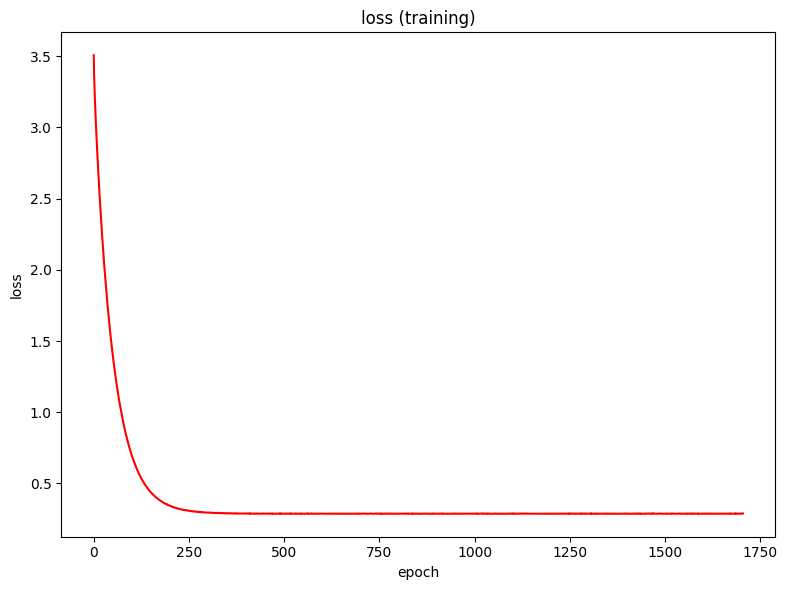


################################################################################
#
# RESULT # 02
#
################################################################################



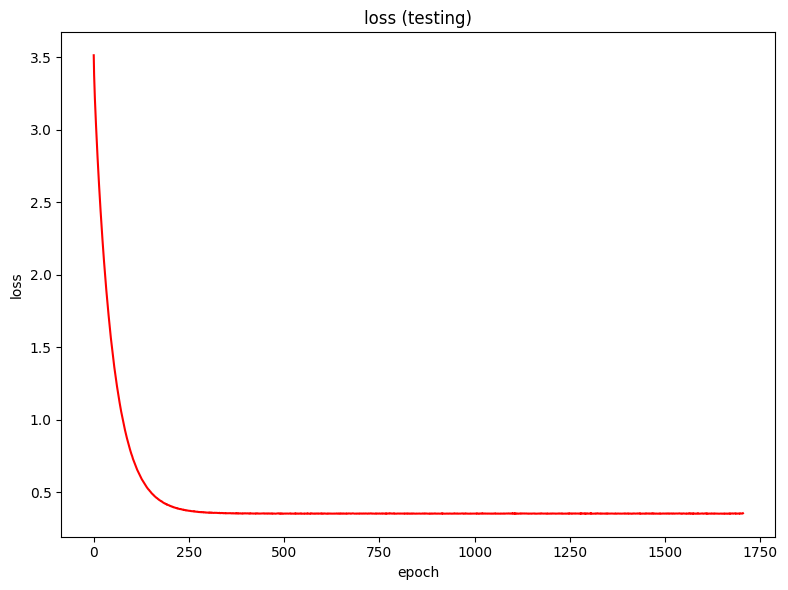


################################################################################
#
# RESULT # 03
#
################################################################################



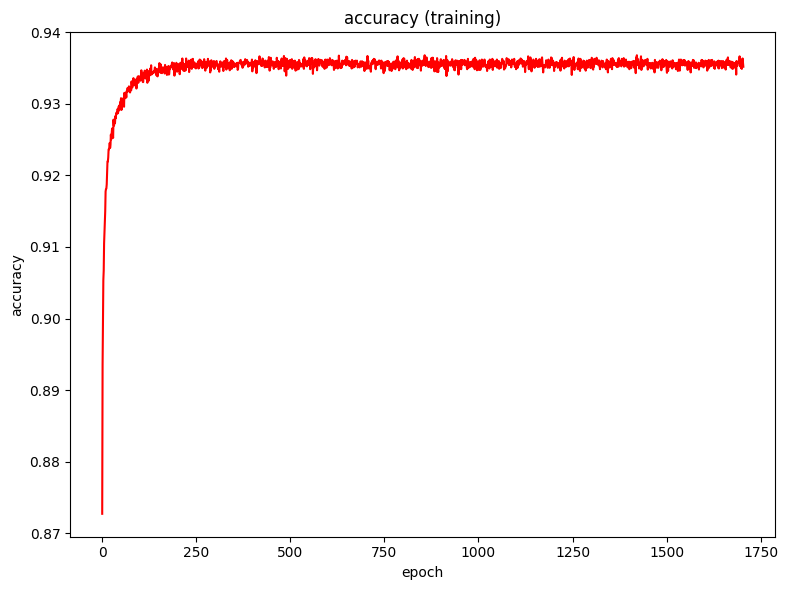


################################################################################
#
# RESULT # 04
#
################################################################################



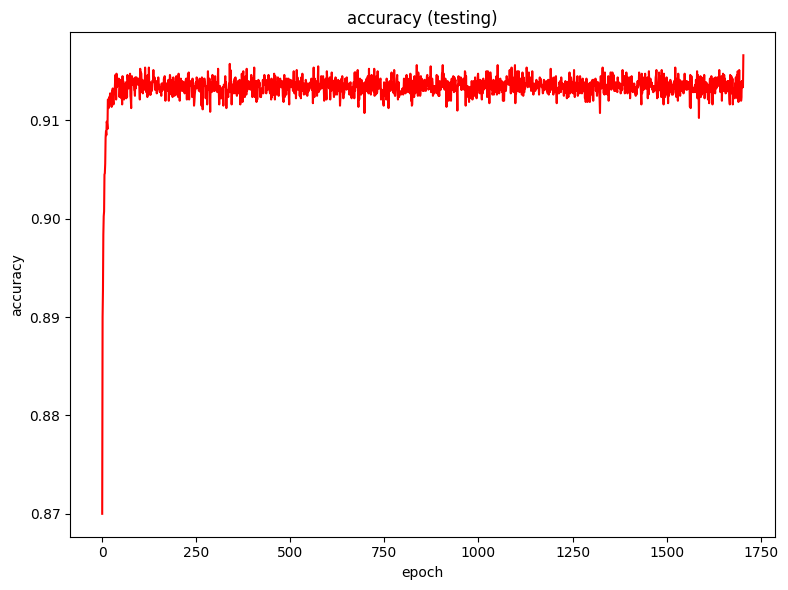


################################################################################
#
# RESULT # 05
#
################################################################################

final training accuracy = 0.93520000

################################################################################
#
# RESULT # 06
#
################################################################################

final testing accuracy = 0.91662500


In [31]:
number_result = 6 

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)